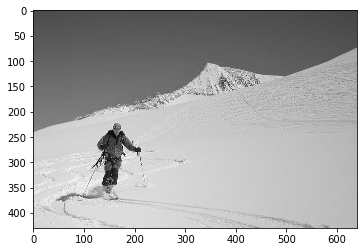

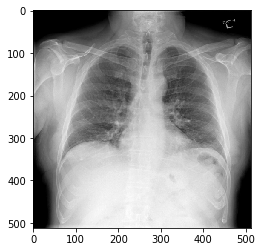

6.9766656188445175

In [1]:
from skimage import data
import matplotlib.pyplot as plt
from skimage import io,img_as_ubyte
from skimage.metrics import peak_signal_noise_ratio
from emee import emee

a=io.imread('000000038118.jpg',as_gray=True)
b=io.imread('CXR7_IM-2263-1001.png',as_gray=True)

plt.imshow(a,cmap='gray',interpolation='nearest')
plt.show()
plt.imshow(b, cmap='gray', interpolation='nearest') 
plt.show()

emee(b,1,4,4,0.001)

In [2]:
from models.lip import LIPImage,LIPSpace
from models.hlip import HLIPImage,HLIPSpace
from models.pslip import PSLIPImage,PSLIPSpace
from models.plip import PLIPSpace

In [3]:
import numpy as np
from skimage.filters import scharr

## Lineal

Lossy conversion from float64 to uint8. Range [3.793045021752113, 449.589205327082]. Convert image to uint8 prior to saving to suppress this warning.


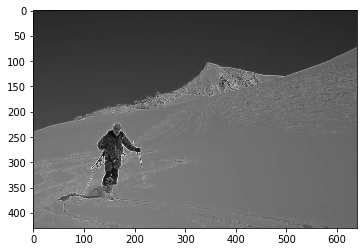

Lossy conversion from float64 to uint8. Range [0.0, 1.4431372549019608]. Convert image to uint8 prior to saving to suppress this warning.


0.38382764819458837


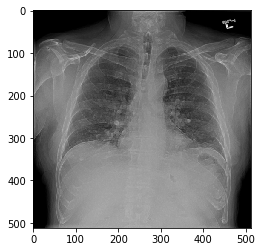

3.4590525204388944

In [88]:
la=np.array(a.tolist())

sla=scharr(la)

sla=sla*255/np.max(sla)

la_sla=la+sla

io.imsave('la_sla.png',la_sla)

plt.imshow(la_sla,cmap='gray',interpolation='nearest')
plt.show()

print(emee(la_sla,1,5,5,0.5))

lb=np.array(b.tolist())

slb=scharr(lb)

slb=slb*1/np.max(slb)

lb_slb=lb+slb

io.imsave('lb_slb.png',lb_slb)

plt.imshow(lb_slb,cmap='gray',interpolation='nearest')
plt.show()

emee(lb_slb,1,4,4,0.001)

## LIP

Lossy conversion from float64 to uint8. Range [0.11499926798751403, 248.84085651103487]. Convert image to uint8 prior to saving to suppress this warning.


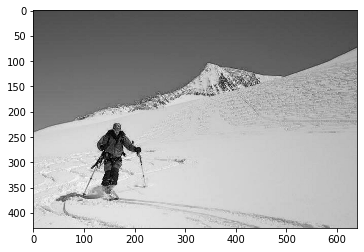

1.8589660981557583


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


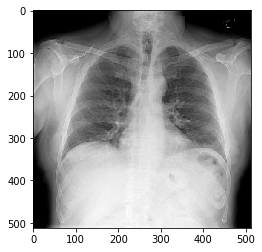

5.3650663578747375

In [119]:
js=LIPSpace()

ja=js.equation(js.gray_tone(a))

ja_sja=js.inverse_gray_tone(js.inverse_equation(ja+scharr(ja)))

io.imsave('ja_sja.png',ja_sja)

plt.imshow(ja_sja,cmap='gray',interpolation='nearest')
plt.show()

print(emee(ja_sja,1,5,5,0.5))

js2=LIPSpace(1)

jb=js2.equation(js2.gray_tone(b))

jb_sjb=js2.inverse_gray_tone(js2.inverse_equation(jb+scharr(jb)))

io.imsave('jb_sjb.png',jb_sjb)

plt.imshow(jb_sjb,cmap='gray',interpolation='nearest')
plt.show()

emee(jb_sjb,1,4,4,0.001)

## HLIP

Lossy conversion from float64 to uint8. Range [0.0071262445910103, 249.4904851389762]. Convert image to uint8 prior to saving to suppress this warning.


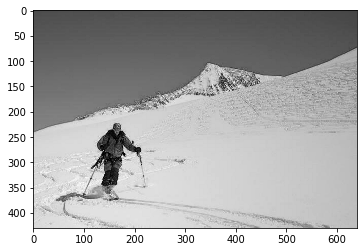

2.920360477449788


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


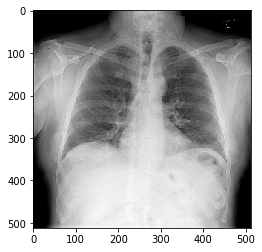

5.806076156113591

In [98]:
hs=HLIPSpace()

ha=hs.equation(hs.gray_tone(a))

ha_sha=hs.inverse_gray_tone(hs.inverse_equation(ha-scharr(ha)))

io.imsave('ha_sha.png',ha_sha)

plt.imshow(ha_sha,cmap='gray',interpolation='nearest')
plt.show()

print(emee(ha_sha,1,5,5,0.5))

hs2=HLIPSpace(1)

hb=hs2.equation(hs2.gray_tone(b))

hb_shb=hs2.inverse_gray_tone(hs2.inverse_equation(hb-scharr(hb)))

io.imsave('hb_shb.png',hb_shb)

plt.imshow(hb_shb,cmap='gray',interpolation='nearest')
plt.show()

emee(hb_shb,1,4,4,0.001)

## PSLIP

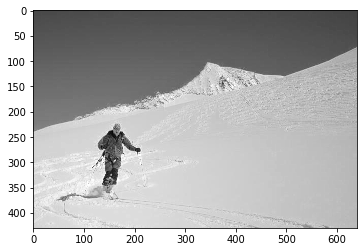

Lossy conversion from float64 to uint8. Range [3.321437194361263, 255.0691835556732]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


0.24465371880453934


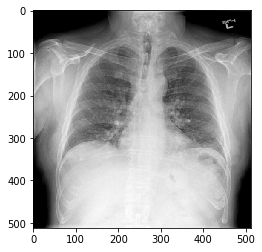

2.3253781958107846

In [6]:

pss=PSLIPSpace()

psa=pss.equation(pss.gray_tone(a))

psa_spsa=pss.inverse_gray_tone(pss.inverse_equation(psa+scharr(psa)))

plt.imshow(psa_spsa,cmap='gray',interpolation='nearest')
plt.show()

io.imsave('psa_spsa.jpg',psa_spsa)

print(emee(psa_spsa,1,5,5,0.5))

pss2=PSLIPSpace(1)

psb=pss2.equation(pss2.gray_tone(b))

psb_spsb=pss2.inverse_gray_tone(pss2.inverse_equation(psb+scharr(psb)))

io.imsave('psb_spsb.jpg',psb_spsb)

plt.imshow(psb_spsb,cmap='gray',interpolation='nearest')
plt.show()

emee(psb_spsb,1,4,4,0.001)

4100 250
[[ 68.          68.          68.         ...  62.          62.
   62.        ]
 [ 68.          68.          68.         ...  62.          62.
   62.        ]
 [ 67.29304723  67.29304723  67.29304723 ...  61.29304747  61.29304747
   61.29304747]
 ...
 [206.29304195 206.29304195 206.29304195 ... 178.29286751 178.29304299
  179.29286752]
 [206.29286769 206.29286769 206.29286769 ... 178.29286751 178.29304299
  179.29286752]
 [205.29304199 205.29304199 205.29304199 ... 178.29286751 178.29304299
  179.29286752]]


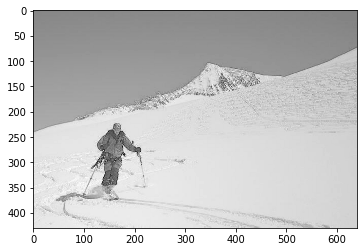

Lossy conversion from float64 to uint8. Range [-125.26067460058903, 243.5281683568082]. Convert image to uint8 prior to saving to suppress this warning.


In [120]:
from emee import emee

mis=[256,400,500,800,1000,1026,4100,600,300,250,200]
gammas=[256,400,1000,2000,300,500,600,512,1026,4100,1280,800,526]

ps=PLIPSpace()

d_1 = 4 if la.shape[0]%4==0 else 5
d_2 = 4 if la.shape[1]%4==0 else 5
max_emee=-1
max_gamma=-1
max_mi=-1
for ga in gammas:
    pa=ps.equation(ps.gray_tone(a),ga)
    pa_spa=ps.inverse_gray_tone(ps.inverse_equation(pa+scharr(pa),ga))
    for mi in mis:
        max_pi_r=np.max(pa_spa)
        if mi < max_pi_r:
            continue
        result=ps.neg(pa_spa,mi)
        actual_emee=emee(result,1,d_1,d_2,0.5)
        if actual_emee > max_emee:
            max_emee=actual_emee
            max_gamma=ga
            max_mi=mi
pa=ps.equation(ps.gray_tone(a),max_gamma)
result=ps.inverse_gray_tone(ps.inverse_equation(pa+scharr(pa),max_gamma),max_mi)
print(max_gamma,max_mi)

print(result)
plt.imshow(result,cmap='gray',interpolation='nearest')
plt.show()

io.imsave('plip.jpg',result)